# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:13:47.254618: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:13:51.279895
2025-04-14 23:13:51.279895


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 6
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:13:44"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

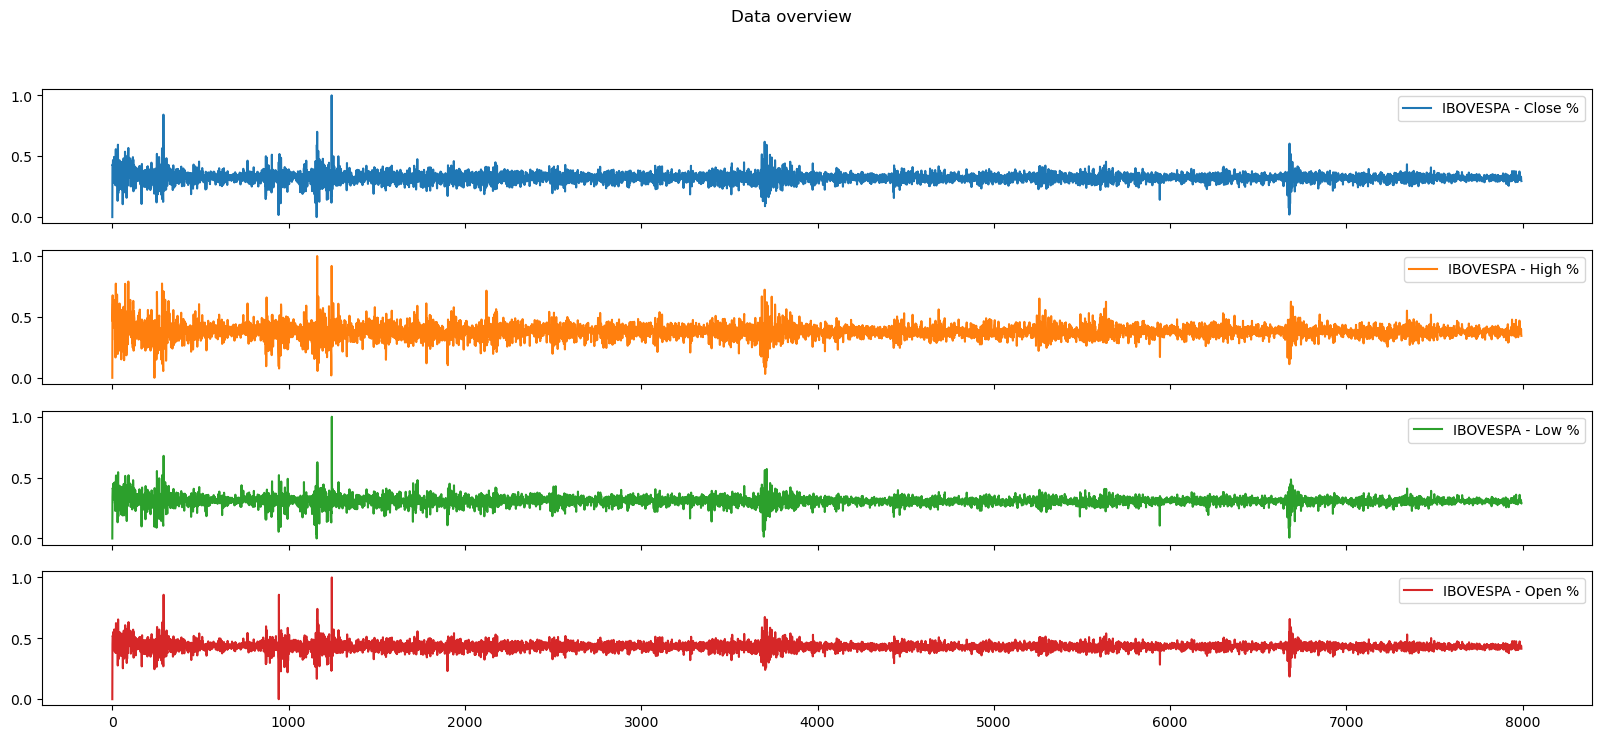

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

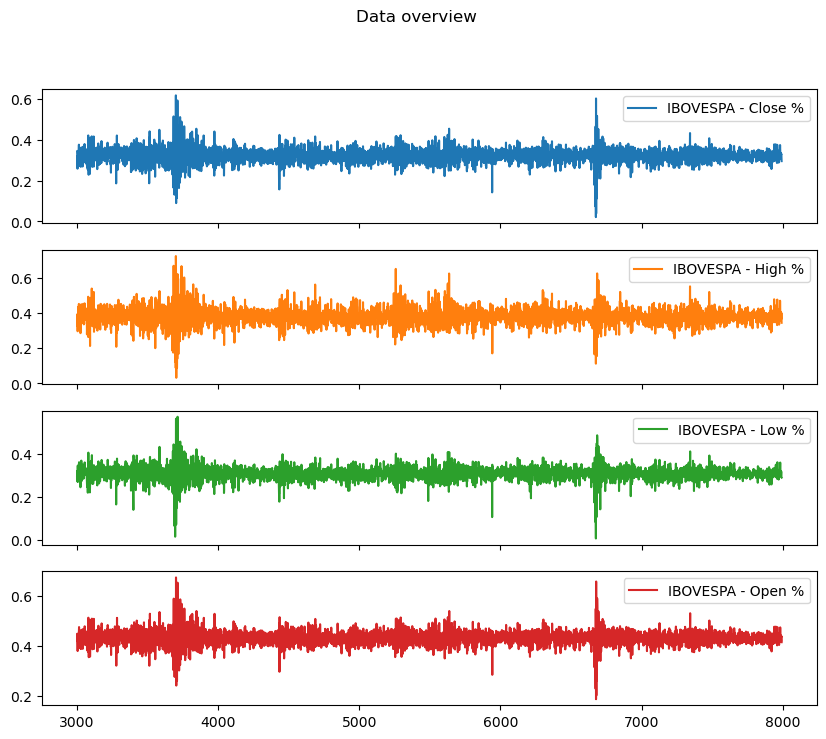

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

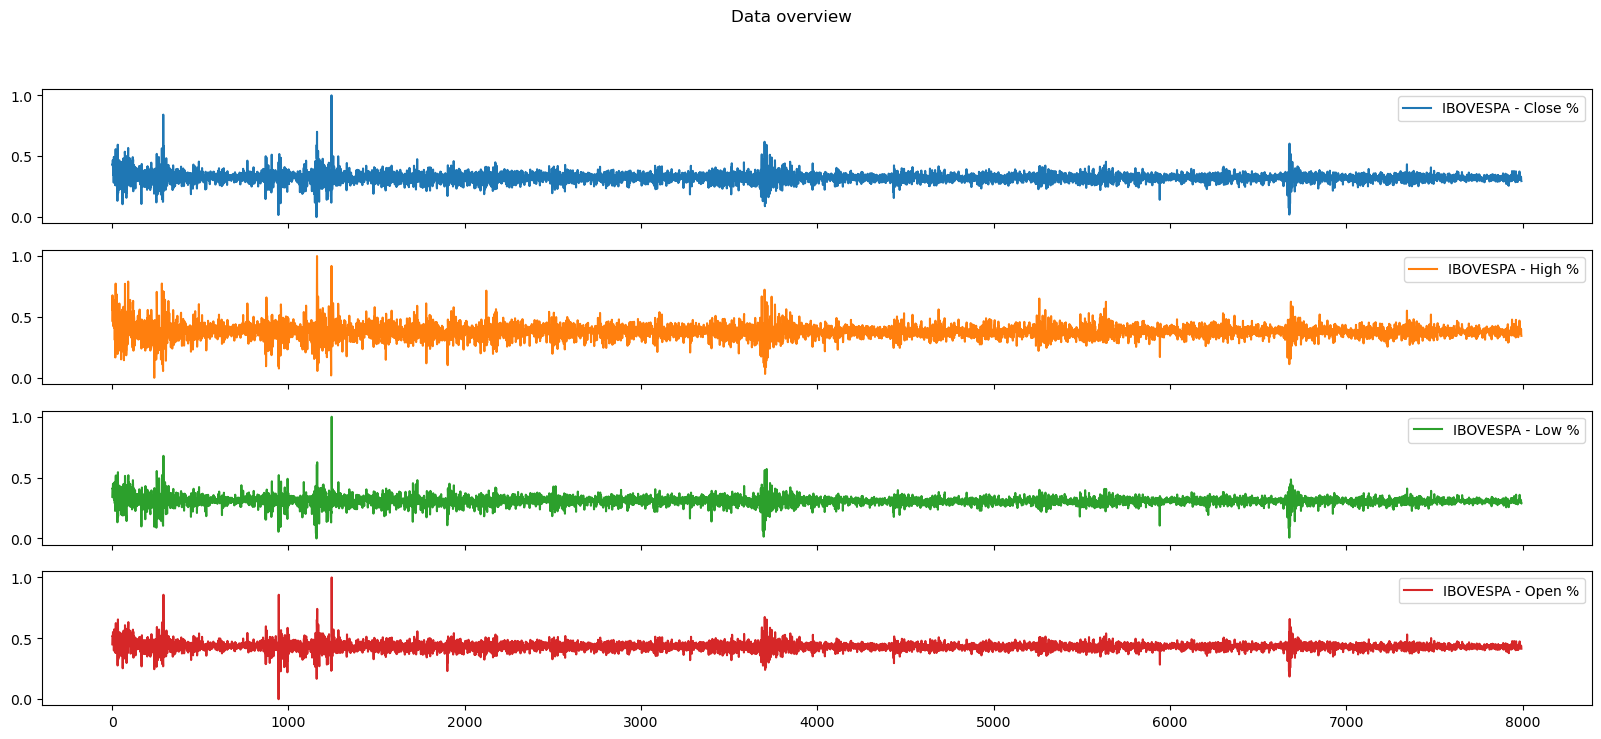

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close %']

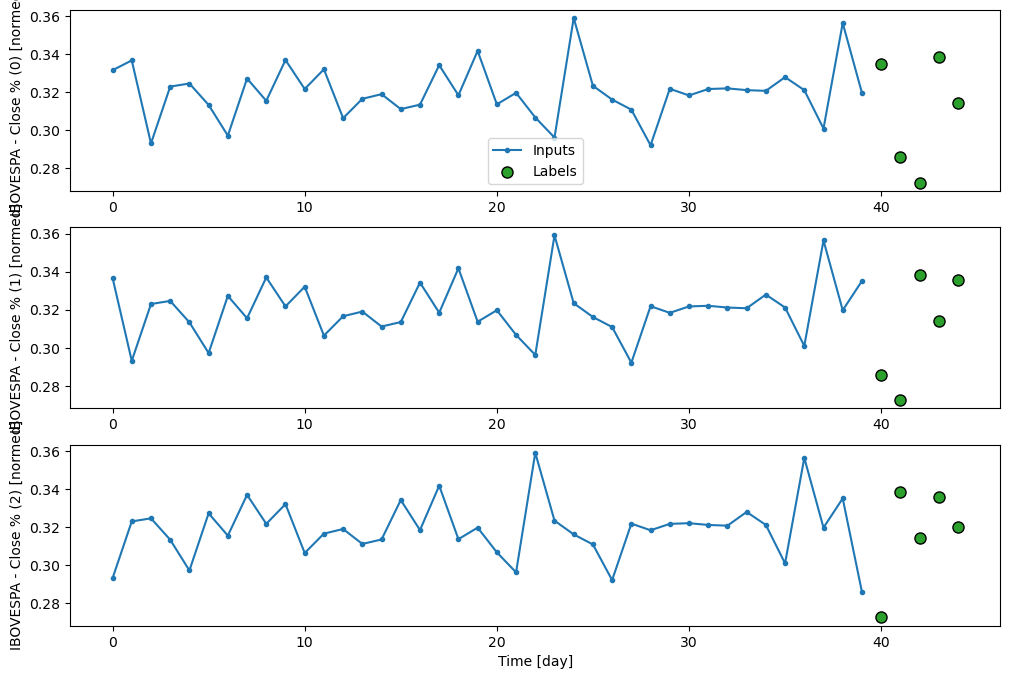

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 8:54 2s/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3539

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 85.0019 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.3126 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 76.1954 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2862

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 69.8765 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2678

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 64.5352 - mean_squared_error: 0.0662 - root_mean_squared_error: 0.2521

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 60.1598 - mean_squared_error: 0.0601 - root_mean_squared_error: 0.2389

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1874 - mean_absolute_error: 0.1874 - mean_absolute_percentage_error: 55.2809 - mean_squared_error: 0.0536 - root_mean_squared_error: 0.2242

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 51.2594 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2120

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 48.1022 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.2019

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1532 - mean_absolute_error: 0.1532 - mean_absolute_percentage_error: 45.6912 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1934

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 23201.2344 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1863

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 46342.9727 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1803

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 63239.2812 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1748

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 75749.9219 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1699

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 85101.9219 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1655

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 92130.7188 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1614

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1170 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 97420.4609 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1577

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 101388.9297 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1542

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 104340.7969 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1510

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 106502.0859 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1480

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 108042.9375 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1452

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 109093.1719 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1426

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 109752.9688 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1402

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 110100.4375 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1379

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 110197.0703 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1357

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 110134.6641 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1341

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 109975.6641 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1326

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 109637.8203 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1307

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 109181.6719 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1289

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 108630.1250 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1271

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 108165.2344 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1259

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 107489.6484 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1243

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 106762.3281 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1228

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 105994.1641 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1214

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 105194.1953 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1201

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 104369.8906 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1187

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 103527.4688 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1175

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 102672.1172 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1162

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 101808.1406 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1151

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 100939.1484 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1139

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 100068.1406 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1128

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 99197.6094 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1118 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 98329.6562 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1107

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 97466.0078 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1097

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 96608.1016 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1088

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 95757.1172 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1078

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 95124.0156 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1072

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 94495.7109 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1065

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 93872.4844 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1058

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 93049.8516 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1050

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 92237.1797 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1042

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 91434.8438 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1034

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 90643.1406 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1026

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 89862.2812 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1018

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 89283.8359 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1013

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 88522.2812 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1005

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 87958.4219 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1000

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 87216.3438 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0993

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 86485.4062 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0987

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 85944.4766 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0982

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 85409.7656 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0977

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 84706.4141 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0971

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 84013.9531 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0964

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 83503.6953 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0960 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 4.1189 - val_mean_squared_error: 2.8373e-04 - val_root_mean_squared_error: 0.0168 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 28.4715 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1012

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 24.1710 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0949

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 23.3240 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0911

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.5838 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.4968 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0852

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.4200 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.4291 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0788

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 18.7564 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.4338 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 23746.9238 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 47461.0039 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 64775.4180 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 77595.8438 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 87179.5781 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 94382.7031 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 99803.7812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 103870.9141 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 106896.3125 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 109111.5625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 110691.0234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 111285.1953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 111767.7188 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 112444.3047 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 112800.8359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 112900.2969 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 112792.6953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 112517.9844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 112108.3281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111589.7656 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110983.4844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110306.8125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109573.9766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108796.6797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107984.6250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107145.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106286.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105413.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104530.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103641.1641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102749.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101856.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100966.9766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100080.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99200.4531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589 

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98326.7734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97460.9453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96603.8359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95756.1328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94918.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94091.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93274.4922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92468.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91674.5391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90891.4688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90119.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89359.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88983.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88425.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87690.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87327.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86788.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86254.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85555.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549 - val_loss: 0.0144 - val_mean_absolute_error: 0.0144 - val_mean_absolute_percentage_error: 4.3751 - val_mean_squared_error: 3.1882e-04 - val_root_mean_squared_error: 0.0179 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 28.3314 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1018

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 25.0632 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 23.2092 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0915

  9/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 23.4157 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0917

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 22.9435 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.8896 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0865

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.0583 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.2580 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0814

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 19.3108 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8580 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0768

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.5485 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 15872.6895 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 35166.3477 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 50308.8359 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 62308.0977 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 74640.0234 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 81795.7344 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 87568.5312 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 92233.1641 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 96001.7500 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 99913.9062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 102824.0234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 104954.8516 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 106144.0703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 107045.6484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107509.7891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108029.4375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108443.0938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108595.6328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108569.7188 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108381.5469 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108144.0000 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107837.3594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 107599.6797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107199.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106755.3594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106104.4609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105399.5391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 104842.2422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104068.6953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103671.1562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103063.8906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102445.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 101819.1641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101186.0234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100548.1016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99906.9453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604 

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99263.8828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98620.0781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97976.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97120.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96268.1641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 95843.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95210.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94790.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94371.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93955.4297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93128.8125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92311.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91502.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90704.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89916.4062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89138.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88372.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87616.0781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87056.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86319.5000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85593.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84878.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84174.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83481.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82799.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82296.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 3.9834 - val_mean_squared_error: 2.6280e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4373 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 25.0007 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0968 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 23.1007 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0898

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.1803 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 22.5247 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0877

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.7141 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0852

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 20.8874 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.0924 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.1526 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0774

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.7055 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.5584 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.4055 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 15580.9531 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 28718.8145 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 39871.3164 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 49383.7422 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 53612.9492 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 57530.4844 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 64531.8164 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 70566.1953 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 73267.4219 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 78116.4688 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 84202.0078 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 89117.6484 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93090.0547 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 97218.6328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 100298.0938 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102563.7266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 104192.0391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 105317.2656 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 106042.7266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 106448.7656 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 106598.5000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 106541.9062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 106318.8516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 105961.3906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 105495.4219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 104942.0000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 104318.3281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 103638.5078 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 102914.1406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 102538.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 102154.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 101368.5000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 100561.7656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 99740.1172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606 

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 98908.1328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98069.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97227.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 96385.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 95544.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 94706.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 93873.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93047.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92227.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91416.1406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 90613.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89820.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89036.4062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88455.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87689.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86934.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86189.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85455.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84732.0625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84019.6016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83317.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82626.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 81946.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 81443.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 81110.7812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 80783.0078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 4.0337 - val_mean_squared_error: 2.6060e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 28.6369 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0992

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 24.1493 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0924 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 23.2397 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 22.4720 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 21.3727 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0835

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 20.2975 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0803

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 19.3125 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.6583 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.3714 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 22253.0703 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 44474.2617 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 60698.6680 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 72711.9922 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 81692.3906 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 88442.0469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 93521.8438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97332.9297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 100167.8672 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 102243.6484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103402.1484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104280.4297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 105091.3203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 105475.6484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 105700.6328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 105793.8281 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 105734.2031 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 105581.8125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 105350.4062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 104938.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0636

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 104430.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103844.7266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 103196.3438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 102498.2656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101760.9688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100993.1094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 100201.8750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 99393.2344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607 

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98572.1641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97950.7266 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 97117.4609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 96281.5781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 95445.5938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94611.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93781.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92956.2812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 92137.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91326.2656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90523.1016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89728.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88943.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88168.5156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87403.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86648.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85904.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85170.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84627.0000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84089.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83558.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82859.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82170.9062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 81493.0391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 80825.6484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 80170.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.8933 - val_mean_squared_error: 2.5096e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4127 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 24.1204 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0935 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.3512 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.8820 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0883

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.8303 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.7354 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.7216 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 18.9051 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.6106 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 15632.1963 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 40002.3242 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 53789.0859 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 64743.8086 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 76028.3672 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 84478.6094 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 90834.3984 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 94545.8281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 97537.9922 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 99939.7891 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101853.9531 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103363.1328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104534.3125 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105422.2109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106071.7969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106520.2344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 106798.4609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 106932.3047 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 106943.4609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 106850.2344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 106668.1172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 106410.2734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 105967.8359 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 105432.7734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 104823.2344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 104154.0781 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103437.5312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102683.6797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101900.8672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 101096.0469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100274.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99442.4609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608 

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98602.5000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97758.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 97124.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96490.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95857.9844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95227.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94808.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94182.0156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93559.3516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92940.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92326.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91716.4062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91111.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90511.8906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89720.7188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88939.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88168.5312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87408.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86658.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85919.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85190.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84473.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83766.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83070.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82385.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81710.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81048.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 3.9597 - val_mean_squared_error: 2.6017e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 28.3652 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1007

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 24.1103 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0937 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 23.2995 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.8657 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.8153 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 20.7192 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.7047 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 19.0687 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.6630 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 8247.0049 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 34996.8398 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 54353.9961 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 68595.3359 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 79196.2891 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 87146.3906 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 91788.5391 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 96620.5312 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 100240.0000 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 102923.8828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 104878.4062 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 106259.3906 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107186.0547 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107750.6562 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108025.3047 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108066.8906 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 107920.6250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 107622.7188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 107202.3594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 106683.2188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106084.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 105422.1953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 104709.0547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 103955.8516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 103171.4297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 102363.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 101537.0469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100698.2656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 100063.4219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 99212.1875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604 

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98571.8516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97931.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 97290.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96439.8125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 95592.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94751.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93916.9453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 93090.1406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 92271.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91462.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90663.2344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89873.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89288.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88709.1641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87946.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87380.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86636.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85903.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85360.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84646.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83943.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83250.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82568.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81899.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8863 - val_mean_squared_error: 2.4975e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4052 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 24.9986 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0963 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 23.1685 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.3236 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 22.6982 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0876

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.8966 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0852

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 21.0701 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 20.2784 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.3378 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0774

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.8075 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.4994 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 29451.8359 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 50644.4336 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 66179.3047 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 77714.1250 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 84418.0547 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0710

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 91392.9531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 96642.2734 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 100580.5391 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 103510.0781 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 105655.1328 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 107184.5469 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 108227.1250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108882.2734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109166.6719 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109320.2344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109262.1953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 109033.4531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108666.8594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108188.9922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107770.7109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107309.6719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 106812.4375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106284.6562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105541.7969 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104763.0859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103956.6797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103129.3438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102498.5391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101861.1641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101218.9922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100573.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99710.1953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600 

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99062.0703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98414.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97768.4453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96910.4844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96270.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95633.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95001.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94373.4766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93750.1797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93131.9219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92518.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91911.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91110.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90319.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89539.5938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88961.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88200.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87824.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87450.6641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87079.8047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86711.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86346.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85983.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85624.0078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85266.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84736.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84386.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84038.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83693.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83181.6562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82845.5156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9072 - val_mean_squared_error: 2.5234e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4074 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 24.9863 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0963 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 23.1472 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 23.1447 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 22.4277 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.3231 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.2624 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 19.3177 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0774

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.7817 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.4656 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 23063.7188 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 41010.9453 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 55145.4844 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 66376.5469 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 77945.7578 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 86609.1641 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 93125.2891 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 98027.6641 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 101699.8516 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 103818.6250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 105495.9297 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 106805.3750 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 108081.1016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108921.5547 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109414.6562 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109629.2969 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109619.9375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 109492.3438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 109278.3594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108880.4922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108511.4844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107942.2344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107300.7344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106601.4766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105856.3906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105075.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104266.5547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103436.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102591.6172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101950.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101305.2109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100657.0703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99790.7188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98924.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98059.8672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97199.3516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96344.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95495.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94654.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93822.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92999.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92387.9141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91581.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90786.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90001.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89226.8281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88463.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87711.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86970.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86240.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85521.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84813.0625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84115.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83429.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83092.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9013 - val_mean_squared_error: 2.5202e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.3916 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 24.0979 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0937

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 23.1851 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 22.9205 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.1764 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.0613 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.0040 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0667 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.5417 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.2373 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 29488.4492 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 50707.5938 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62802.0586 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 72458.1562 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 80210.9219 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 88262.9219 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 94322.0078 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98877.6797 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101524.3672 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103639.4844 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105787.2266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107318.5625 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108362.4531 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109018.4219 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109364.0859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109460.5156 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 109356.1875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109089.8438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108802.7578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108575.9922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 108189.8984 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107756.0312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107115.6328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106417.5859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105673.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 105091.9219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104493.4219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103674.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102838.0938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101988.5703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101130.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100267.3750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99402.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595 

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98537.6328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97675.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96817.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95965.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95120.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94282.9531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93454.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92634.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91824.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91025.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90236.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89458.0312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88690.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87934.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87188.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86454.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85731.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85018.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84317.4688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83626.9453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82949.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8171 - val_mean_squared_error: 2.4004e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4294 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 24.9504 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0959 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.0597 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 23.0008 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 21.9987 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 20.8962 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.8515 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.9692 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.5514 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 8430.7930 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35778.4883 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 55568.2695 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 70127.8984 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 80965.7734 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 87273.3516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0703

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93839.4688 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98779.4609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 102479.8281 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 105223.6953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 107221.9062 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 108633.7500 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109581.1328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110158.3516 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110439.1484 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110481.6641 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110332.1328 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110027.5781 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109597.8281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109067.0859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108455.0547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107777.8828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107048.8125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106278.7734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105476.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104650.4609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103805.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102948.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102082.2188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101211.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100337.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99464.9844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98594.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97728.8906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96868.7422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96015.5391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95170.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94541.9688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93918.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93301.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92689.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91882.0469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91085.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90299.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89525.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88761.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88009.2656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87452.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86901.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86357.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85640.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84935.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84241.3906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83729.7812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8810 - val_mean_squared_error: 2.4902e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.3936 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 24.0746 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0933

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.2445 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.5272 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.4406 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.3658 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.3752 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.7045 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.3941 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 23071.0977 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 41024.1836 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 59194.2031 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 69616.8359 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 80375.7109 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 88444.2578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 94515.7812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 99080.8125 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102493.7031 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 105015.1797 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106840.1328 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108116.2812 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108957.0078 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109450.2734 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109664.9922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 109655.6250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 109465.5703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 109129.6250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 108675.8828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 108127.1562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107502.0391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106815.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 106080.9219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105307.8047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104504.9922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103679.6016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102837.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101983.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101122.3281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100256.7031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99389.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593 

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98523.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97660.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96802.5469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95950.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95105.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94268.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93439.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92621.1641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91812.2969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91212.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90618.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90030.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89255.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88492.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87739.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86998.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86268.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85548.9531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84840.6875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84143.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83456.7812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83119.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 3.9278 - val_mean_squared_error: 2.5569e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 28.3809 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 24.0666 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0935

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.2185 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.4922 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.4027 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.3276 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.3389 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.6690 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.3592 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 23207.9238 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 46383.4023 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 63304.5625 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 75833.8047 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 85199.8750 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 92239.4062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97537.3672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101512.1250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104468.8125 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106633.7422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 108177.3281 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109229.5703 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109890.7891 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110239.2188 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110336.4219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110231.2578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110043.3750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109673.3906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109191.1016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 108618.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107972.7734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107269.1328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106519.3906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105733.4688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104919.5938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104084.5938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103234.1641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102373.0234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101505.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100633.7734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99761.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98891.1875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98024.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97162.1797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96306.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95458.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94618.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93787.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92966.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92155.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91354.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90564.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89785.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89017.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88260.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87514.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86780.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86056.7344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85344.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84642.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83952.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83612.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.8894 - val_mean_squared_error: 2.5029e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4040 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 24.0636 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0935 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.1522 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.4042 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.3113 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.2377 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.2521 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.5860 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.2801 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 23222.4316 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 46412.4883 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 63344.2930 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 75881.4141 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 85253.3828 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 92297.3438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97598.6328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101575.8984 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104534.4453 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106700.7344 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 108245.2891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109298.1953 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109959.8281 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110308.4766 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110405.7422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110300.5078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110031.8672 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109631.2578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109124.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108531.2500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 107869.5312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107152.8828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106392.7578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105598.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104778.3750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103938.5000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103084.4453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102220.7344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101351.1406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100697.0000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99824.3828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98953.3281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98085.7500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97223.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96367.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95518.3828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94678.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93846.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93024.9688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92213.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91412.1562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90621.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89842.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89073.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88316.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87755.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87200.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86652.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86110.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85575.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85045.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84349.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83665.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8501 - val_mean_squared_error: 2.4479e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4205 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 24.0781 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.2456 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.5312 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0871

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.4459 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.3704 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.3791 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.7072 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.3950 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 23200.2969 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 46368.1172 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 63283.6875 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 73013.8438 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 83076.5938 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 90632.3672 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 96319.2031 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100591.0234 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103777.3359 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 106121.5781 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107806.3906 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108970.6641 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109721.3047 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110141.4375 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110296.3750 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110237.8125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110007.0312 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109637.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109155.0312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 108582.4141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107937.1016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107233.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106484.1953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105698.5391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104884.9297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104050.2109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103200.0547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102339.2031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101471.5938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100600.5234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99728.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98858.5156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97991.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97130.0781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96274.7500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95426.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94587.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93756.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92935.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92124.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91324.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90534.8438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89756.0078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88988.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88231.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87485.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86751.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86028.2969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85316.0625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84614.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83924.3984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83585.2578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9162 - val_mean_squared_error: 2.5444e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 28.4007 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 24.0929 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0938

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.1477 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.3797 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0875

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.2829 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.2096 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0809

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.2252 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.5608 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.2564 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 23264.3516 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 46496.3320 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 63458.7461 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 76018.5312 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 85407.4375 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 92464.1328 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97775.0078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101759.4531 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104723.3516 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106893.5625 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 108440.9062 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109495.7188 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110158.5469 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110507.8281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110605.2656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110499.8438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110311.5078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109940.6250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109457.1562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 108882.9531 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108235.8594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107530.5078 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106778.9375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105991.1016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105175.2422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104338.2188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103485.7109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102622.4766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101752.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100878.9844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100004.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99132.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98263.0078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97398.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96541.2422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95691.0000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94849.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94016.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93193.0859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92379.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91577.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90785.4453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90004.4609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89234.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88475.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87728.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86991.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86266.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85552.2266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84849.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84156.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83816.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 3.9423 - val_mean_squared_error: 2.5806e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 28.3781 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 24.0947 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0939 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.1753 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.4155 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0876

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.3203 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0843

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.2472 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.2614 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0780

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.5948 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2878 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 23312.6953 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 46592.9570 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 63590.6250 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 76176.5156 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 85584.9297 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 92656.2812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 97978.1953 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101970.9219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 104280.8047 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 106636.4219 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 108329.4141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 109499.3438 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 110253.6172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110597.5391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110783.4297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110835.1094 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110729.4688 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110459.7812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110057.6172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109548.5312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108953.3281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108289.0391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107569.5938 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106806.5156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106009.3047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105185.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104342.7188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103485.3359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102618.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101963.9062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101088.6094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100212.5938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99338.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98467.2031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97601.3281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96741.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95889.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95046.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94211.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93386.7422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92571.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91767.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90974.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90191.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89419.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88659.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87910.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87172.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86445.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85729.9922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85025.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84331.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83990.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8640 - val_mean_squared_error: 2.4681e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4084 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 24.0556 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0935

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.0882 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.3106 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.2115 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.1391 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.1566 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4930 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1884 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 23379.1855 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 46725.9961 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 63772.2539 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 76394.1172 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 83718.0781 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 91332.2188 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 95779.3359 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100405.4141 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103863.9531 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106419.1484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 108268.5000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109561.7188 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110413.6953 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110913.5547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111131.1484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111121.6641 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 99/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110929.0703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110588.6328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110128.8281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109572.7578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108939.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108243.8594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107499.1797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106715.7188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105902.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105065.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104427.0625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103997.0781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103347.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102693.0547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102036.0312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101377.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100718.5156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100060.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99403.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98748.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98096.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97448.3828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96803.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96163.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95528.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94898.1484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94480.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93859.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93039.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92431.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91829.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91234.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90840.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90254.7266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89675.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89102.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88348.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87605.5391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86873.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86332.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85620.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85093.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84572.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84230.7969 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8642 - val_mean_squared_error: 2.4679e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4220 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 24.9913 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0968 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 23.0549 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.7174 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.2149 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0875

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.3936 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.2992 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.5281 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 18.8475 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.3983 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.0976 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 16241.9902 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 35985.6172 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 51481.2578 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 63760.3711 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 73563.8906 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 81435.0156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 87779.1719 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 92903.7266 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97044.9531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100386.7578 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103073.8516 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 105221.2656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106921.2500 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 107401.8047 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 108248.3984 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108956.5156 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109541.3750 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 110016.3438 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110682.3281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111033.2734 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111131.1797 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111025.2578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110754.8516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110351.6172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109841.1719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109244.3828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108578.3203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107856.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107091.8438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106292.5078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105466.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104621.4609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103761.7969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103110.4531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102455.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101797.7422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101139.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100480.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99822.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99166.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98295.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97645.9844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97000.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96146.0156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95510.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95090.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94463.3359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93842.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93226.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92616.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92012.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91415.0312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90823.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90237.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89467.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88707.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88332.0312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87773.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87222.1328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86676.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86316.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85781.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85077.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84385.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84215.1797 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8824 - val_mean_squared_error: 2.4915e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.3923 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 24.9800 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0969 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 23.0482 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.4713 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.3957 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.3028 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 19.7808 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.0613 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4024 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.1028 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 23418.4609 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 46804.6094 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 63879.5898 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 76522.7188 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 85973.9297 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 91485.9922 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97226.4219 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101538.5000 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104754.8438 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 107121.1797 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 108821.8750 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109997.1250 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110754.8438 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 111178.9453 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111335.3438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111276.2422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111043.2812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110669.9453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110183.2734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109605.2578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108953.8750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108243.8438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107487.2891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106694.2266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105872.9609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105030.3750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104172.2188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103303.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102427.4766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101548.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100668.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99789.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98914.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98045.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97181.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96325.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95478.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94639.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93811.3125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92992.8281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92184.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91387.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90601.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90019.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89252.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88497.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87753.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87020.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86298.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85587.8203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84888.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84372.6484 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8103 - val_mean_squared_error: 2.3942e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4379 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 24.9755 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0965 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.0327 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 22.4447 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 21.3657 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 20.2726 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.2643 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.4513 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 32/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.1452 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 16333.8662 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 41799.9023 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 60313.7930 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 73980.4531 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 84176.5000 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 91832.3516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97594.5234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101922.9297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 105151.4531 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 107526.7500 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 109233.8828 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 110413.5859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 111174.1719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111599.8750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111756.8672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111697.5391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111463.7031 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 111088.9453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110600.4375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110020.2344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109366.3828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108836.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108279.1172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107500.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106689.0703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105853.2109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104998.9609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104131.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103475.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102815.2734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101932.6719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101049.3359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100387.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99727.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99070.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98416.2656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97765.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97119.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96264.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95628.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94998.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94373.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93549.3203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92938.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92332.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91733.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91140.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90360.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89590.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88832.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88270.9922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87532.5000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86805.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86089.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85559.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84863.1719 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84692.0859 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7945 - val_mean_squared_error: 2.3717e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4397 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 24.0525 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0935 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.0263 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.6840 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.6371 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 20.7965 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 19.7455 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.0271 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.4457 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.2194 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 17.9957 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 23496.7129 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 41781.5156 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 56181.9219 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 67624.2422 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 79411.0625 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 86261.4609 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 91791.9609 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 96261.4766 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100910.8438 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103611.9766 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105770.6016 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 107479.4609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108813.5312 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 110113.2656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110791.7734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 111375.3750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111659.2812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111702.2656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111551.0859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111243.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110927.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110551.7969 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110124.3828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109653.2734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109318.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108788.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108231.5000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107650.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107051.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106435.3281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105806.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105167.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104520.6406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103867.5234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103210.0469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102549.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101887.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101225.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100563.8906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99903.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99245.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98590.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97722.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97076.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96434.5781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95586.4922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94747.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93918.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93303.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92493.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91892.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91297.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90709.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90320.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89742.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89170.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88605.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88046.5781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87494.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86947.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86587.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86229.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85697.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85172.1016 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84654.8438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7448 - val_mean_squared_error: 2.3061e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4744 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 24.9485 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0959 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 23.2485 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0904

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.0361 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.7124 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 21.9511 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0860

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 21.1114 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 20.3037 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0811

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.5316 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0788

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.6589 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0761

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.3269 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 18.0232 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 30017.8105 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 51618.2656 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 67452.1172 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 76583.1953 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 86041.8750 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93151.0078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 97303.2656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100653.9609 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104121.0625 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106682.5859 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 108130.4844 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109554.3047 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110509.7188 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110976.9375 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111266.8125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111406.2656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111417.8984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111320.7812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111203.6875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110959.9609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110645.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110133.5391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109535.1641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108867.3281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108329.3906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107765.3125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107179.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106575.4297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105747.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105113.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104254.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103603.1016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102947.2969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102068.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101408.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100527.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99649.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98993.0547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98339.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97473.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96615.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95764.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94923.6328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94091.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93270.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92458.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91658.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90868.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90090.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89323.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88567.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87822.4375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87088.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86366.6641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85655.4688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85129.3047 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84609.9141 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84439.3359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7403 - val_mean_squared_error: 2.2999e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4774 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 24.0408 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.9999 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 22.1889 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 21.0834 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 20.0123 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.0342 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.3743 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.0712 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 23450.0000 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 46867.6992 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 63965.7109 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 76625.8984 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 86089.8594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93202.9609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98556.2891 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102572.5938 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105560.1797 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107747.7344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109307.4531 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110370.7031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 111038.8359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111390.9062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111489.1250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111382.8672 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111111.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110707.0547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110194.9688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109596.2578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108928.0469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108204.3594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107436.7812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106634.8672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105806.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105172.0156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104312.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103442.5625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102565.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101685.1406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100803.9531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99924.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99048.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98177.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97312.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96455.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95607.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94767.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93937.8203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93118.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92309.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91510.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90723.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89947.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89182.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88429.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87686.8828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86955.8047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86235.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85527.0625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84829.2188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84486.4219 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 3.7625 - val_mean_squared_error: 2.3300e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4659 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 24.0374 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.0075 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.2020 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 21.0979 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 20.0265 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0804

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.0474 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0774

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.3869 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.0842 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 16295.0381 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 41700.4570 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 60170.2773 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 73804.4062 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 83976.1797 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 91613.8047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 97362.2578 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100714.9844 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102577.5703 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104901.1953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107270.8438 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108973.9141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 110150.8047 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110754.1406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 111159.1953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111396.3125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111490.8984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111431.7109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111271.1172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111027.2422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110712.4297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110337.2109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109758.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109106.1016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108577.6406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108021.4297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107442.0000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106843.2969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106228.7344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105601.2891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104963.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104317.7656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103447.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102790.2812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101910.3750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101249.3984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100588.7109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99929.2031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99271.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98399.2500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97532.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96673.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95823.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94981.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94148.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93326.6875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92514.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91713.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90923.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90338.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89759.7266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88997.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88433.5000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87691.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87141.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86419.0234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85707.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85180.9141 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84661.2109 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84490.5312 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7422 - val_mean_squared_error: 2.3036e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4836 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 24.9395 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0958 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.0359 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.7171 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 21.6805 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0852

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 20.8417 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.0475 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.3002 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0780

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 18.8570 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.4060 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.1019 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 16295.8896 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 36105.1055 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 51652.2188 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63972.1250 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 73808.2031 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 81705.4766 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 88070.7109 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93212.2812 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97367.2656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99681.9922 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101685.5859 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103416.1797 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106185.1328 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108201.6016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109626.3594 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110381.7266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110915.2734 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111261.2578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111448.2656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111500.2656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111437.4297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111204.1328 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110830.2500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110342.8750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109764.0312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109111.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108583.2109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108215.1719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107642.9922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107050.2812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106440.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105817.1328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105182.5156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104539.1562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103889.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103234.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102575.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101915.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101254.5938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100593.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99934.3281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99276.7734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98621.8906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97970.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97322.4453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96892.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96252.3359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95616.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94986.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94360.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93741.3125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93127.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92519.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91917.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91322.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90732.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90149.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89572.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89002.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88438.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88065.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87511.8047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86964.4844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86423.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86066.2422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85535.6016 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85011.1406 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84494.8594 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7502 - val_mean_squared_error: 2.3092e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.4920 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 24.9464 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0957 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 22.9399 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 22.9025 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 22.2118 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 21.3933 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0843

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.2995 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.5272 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.6542 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.3218 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0898 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 23430.5195 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 46828.7305 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63912.5195 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 76562.1719 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 86018.2500 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93125.4297 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98474.3047 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102487.2578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104808.8359 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107176.3984 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108506.7109 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109802.7734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110656.6250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111061.3203 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111298.2344 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111392.7266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111366.1562 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111236.5391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111019.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110726.9844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110240.0625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109661.7500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109010.0312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108299.6406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107542.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106749.2266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105927.5312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105296.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104441.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103574.6406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103137.9453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102260.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101380.3984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100500.1406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99621.9766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98965.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98312.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97447.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96588.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95738.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95106.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94272.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93653.9688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93040.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92433.4688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91832.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91237.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90453.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89872.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89108.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88355.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87613.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87065.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86522.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85808.6484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85105.9141 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84416.1328 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7368 - val_mean_squared_error: 2.2909e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.4995 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.9375 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.0395 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.7208 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.9609 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.1216 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.3134 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0809

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.7899 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8573 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.3332 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 18.0278 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23425.7285 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 41655.2227 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 60104.9961 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 73724.3203 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83885.0547 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 91514.3906 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 95970.3828 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 100605.6875 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104071.1172 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106631.4141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108484.4609 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109501.7578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110456.7109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110923.7031 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111275.4141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111373.5312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111267.3828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110996.3828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110704.2812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110217.4609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109639.2734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109156.6016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108639.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107904.1875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107128.0000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106524.3125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105696.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104849.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103988.0781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103335.3125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102459.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101799.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101139.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100479.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99820.7500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99163.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98292.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97642.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96997.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96355.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95719.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94878.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94253.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93429.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92616.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91813.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91021.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90434.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89662.2969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89090.3125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88337.5156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87780.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87229.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86865.6484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86325.2266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85614.3750 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84914.5234 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84398.8281 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7289 - val_mean_squared_error: 2.2766e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5154 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 24.0259 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0924 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 23.0339 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.2444 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0865

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1439 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0716 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0899 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.4267 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.1205 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16270.9854 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 36049.8711 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51573.1797 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63874.2227 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76516.2891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85966.6875 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93069.6094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98415.2656 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102425.8203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105409.1250 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107112.1406 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108812.6875 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109987.8359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110745.4844 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111169.5547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111308.8828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111299.3828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111169.8438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110862.9766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110429.9688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109895.1953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109439.4219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108944.6719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108234.7031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107478.2109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106886.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106071.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105233.8047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104379.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103512.5312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102638.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101759.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100879.6094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100220.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99343.3828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98688.5391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97820.2969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97173.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96530.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95681.2734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94840.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94216.4297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93597.8047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92984.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92177.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91379.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90593.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90011.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89245.0312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88489.7188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87745.6562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87012.8203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86291.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85757.1875 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85229.4219 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84535.9375 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84365.5078 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7387 - val_mean_squared_error: 2.2873e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5198 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 24.0300 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 23.0358 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.2457 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0865

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1451 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.3366 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0808

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.3230 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.5042 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1937 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16274.8203 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 36058.3711 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 56003.1914 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 67409.0859 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76534.3359 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83871.7422 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89791.1250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 95955.1484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99552.8906 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103282.2344 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106047.6016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108061.4609 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109484.3672 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110238.7578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110906.0938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111195.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111352.2031 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111293.0938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111132.6953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110889.1250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110456.0156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109921.1172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109465.2422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108797.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108260.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107503.5703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106710.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106096.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105258.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104403.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103754.5312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102881.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102003.5312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101123.4453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100243.8359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99366.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581 

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98494.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97843.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96981.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96340.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95703.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94863.0234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94446.1641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94031.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93414.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92803.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92198.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91401.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90615.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89840.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89266.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88698.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87951.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87215.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86490.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85954.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85424.8047 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84727.7969 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84385.4141 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7309 - val_mean_squared_error: 2.2742e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5463 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 24.0290 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0922 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 23.0575 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.2775 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.4639 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.6368 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.5952 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.7183 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.3054 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 8507.7188 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 36106.2773 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46873.9141 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 56077.5938 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63974.1680 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73810.5547 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 81708.0703 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89910.4062 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 94699.8438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98569.2578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101688.7969 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104192.8281 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106188.4766 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108205.0156 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109629.8125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110585.8828 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111168.3984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111405.5391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111503.7734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111440.9375 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111207.6328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110833.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110346.3438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109767.4766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 109115.1328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108586.6250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107839.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107253.2656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106648.8750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 106029.6484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105185.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104326.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103674.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102798.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101918.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101037.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 100157.1328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99279.8828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580 

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98407.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97540.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96895.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96042.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95198.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94363.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93538.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92724.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91920.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91325.0625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90540.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89767.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89005.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88254.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87514.5391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86786.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86068.9297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85362.7656 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84668.1953 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84497.5000 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7305 - val_mean_squared_error: 2.2744e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5367 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 24.0202 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 23.0513 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.2736 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.1763 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.1031 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.1193 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.4548 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.1488 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23459.4746 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46886.5625 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63991.4336 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76656.6953 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 86124.4453 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 93240.3906 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98595.8672 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102613.7734 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105602.5547 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107790.9922 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109351.3281 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110415.0000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111083.3984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111435.6094 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111533.8750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111427.5703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111237.6562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110968.7656 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110507.3828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109949.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109313.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108615.9375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107868.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107082.5391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106266.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105426.8984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104570.6562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103702.4766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102826.5312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101946.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101285.1016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100404.0938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99525.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581 

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98651.6016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97783.3359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96922.0781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96068.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95224.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94389.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93564.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92749.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91945.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91152.4844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90370.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89599.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88840.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88091.9531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87354.9688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86629.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85914.5391 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85210.9375 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84520.3047 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7370 - val_mean_squared_error: 2.2973e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4983 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 24.9282 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.0220 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.4583 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0874

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 21.3876 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.2953 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0809

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.2840 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.4673 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1576 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16303.8848 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 41723.1133 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 60202.9727 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 73844.5078 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84021.8125 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 91663.5859 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 97415.1562 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101735.6016 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104958.1875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107329.1250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109033.1172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110210.6484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110969.8359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111394.7578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111551.4609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111492.2422 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111258.8359 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110884.7734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110397.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109818.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 109165.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108453.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107695.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106901.3359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 106078.4766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105234.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104374.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103503.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102626.2969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101745.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100863.6016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99983.4766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 99106.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98235.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97370.3125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96512.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95663.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94823.6641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93993.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93173.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92363.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91565.0781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90777.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90000.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89235.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88481.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87738.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87007.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86286.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85577.6641 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84879.4062 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84536.4062 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7289 - val_mean_squared_error: 2.2780e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5231 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 24.0200 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0924

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 23.0339 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.2495 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1512 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.0784 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0956 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.4320 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.1268 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23484.6973 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46937.0156 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 64060.3047 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70866.0859 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76739.2109 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 79370.2891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 81818.1094 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84096.2578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 86217.1484 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90031.4922 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 93340.7656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96212.0156 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 99819.3984 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103558.7266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106331.4922 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108350.7422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109777.4609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110734.8203 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111318.1250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111601.8828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111644.8516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111493.7500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 111185.9844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110751.7109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110215.3828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109596.9062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108912.6094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 108175.8672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107397.7266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106587.3281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105752.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104898.8281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 104032.2812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103156.9844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 102276.5938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101394.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100512.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99632.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581 

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98757.8125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97888.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 97026.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96172.2344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95326.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94490.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93664.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92849.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92044.5469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91250.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90467.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89696.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88935.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88186.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87449.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86722.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86007.0391 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85477.7344 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85128.2969 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84611.3047 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7238 - val_mean_squared_error: 2.2728e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5137 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 24.0126 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0924

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 23.0262 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.2417 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.1438 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.0717 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0894 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.4260 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.1206 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23489.2422 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46946.1094 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 64072.7227 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76754.0859 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 86233.8672 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 93358.8672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98721.1484 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102744.1641 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105736.7422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107927.9609 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109490.2891 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110555.3125 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 111089.6953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111515.0859 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111671.9531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111645.3203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111515.3750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111297.4375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 111004.5391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110647.8047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110236.7578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109779.5703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 109283.2812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108753.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 108196.8438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107616.4766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 107016.7969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106401.2344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105772.7734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104919.1719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 104270.1094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103615.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102737.1406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 102075.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101413.8047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100752.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 100091.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99432.8750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580 

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98559.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97907.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 97045.2422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96190.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95555.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94717.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94301.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93888.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93273.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92665.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92062.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91465.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90680.0312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90098.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89522.3984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 89142.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88577.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87833.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87283.2422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86739.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86023.7109 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85494.3047 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84798.6641 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84627.7031 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7384 - val_mean_squared_error: 2.2927e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5021 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 24.0154 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.0271 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.7104 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.9522 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1140 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0418 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.2935 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.6584 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.3256 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1663 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0205 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16294.1484 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41698.1680 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 60166.9727 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73800.3516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83971.5625 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 91608.7734 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 97356.9062 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101674.7656 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104895.4297 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107264.9375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108596.3516 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109893.4922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110748.0469 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111249.4219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111467.6797 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111458.1641 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111264.9922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 111021.1328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110706.3281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110331.1328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109904.5781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109434.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108927.3359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108389.1016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107824.7109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107436.0781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107038.8828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106429.2891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105805.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105383.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104957.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104528.0234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103878.0234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 103004.0312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102345.0156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101684.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 101023.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100363.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99704.2656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 99047.5938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98393.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97959.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97312.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96668.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96029.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95395.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94558.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93731.3203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93117.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92308.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91510.3125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90723.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89947.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89182.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88428.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87686.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86955.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86235.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85526.4766 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84828.6406 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84485.8438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7488 - val_mean_squared_error: 2.3065e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5059 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 24.0173 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 23.0156 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.2243 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0865

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1248 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0527 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0708 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.4080 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.1032 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23517.8613 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 47003.3477 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 64150.8594 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76847.6953 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 86339.0469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 93472.7344 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98841.5625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102869.4844 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105865.7188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108059.6172 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109623.8516 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110690.1719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111360.2344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111713.3281 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111811.8359 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111748.8203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111514.8750 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 111139.9453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110651.2109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 110070.7422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 109416.5859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108703.5391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107943.7734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 107147.3438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 106322.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105476.4219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104614.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103741.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102862.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101979.4453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 101095.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 100213.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 99334.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579 

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98461.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97594.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96734.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95883.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 95041.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 94209.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93387.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92576.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91775.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90986.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90207.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 89440.8828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88685.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87940.6641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87207.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86485.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85774.5859 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 85074.7188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84730.9297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7518 - val_mean_squared_error: 2.3111e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0040


Epoch 38/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5005 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 24.0178 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 23.0103 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.2149 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1142 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0419 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0604 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.3977 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.0926 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23488.1191 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0721

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46943.8945 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 64069.7109 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76750.4844 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 86229.8281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93354.4922 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98716.5234 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102739.3594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105731.7969 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107922.9141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109485.1719 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110550.1406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111219.3594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111572.0078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111670.3906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111563.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111292.2344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110887.0391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110374.1172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109774.4375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 109105.1328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108380.2734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107611.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106808.2266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105978.5703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105129.0703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 104265.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103391.6250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102732.3359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101850.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100967.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 100086.7891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 99209.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579 

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98336.8750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97470.9141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96612.4922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95762.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94921.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 94090.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93269.5938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92459.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91659.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90871.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90093.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 89327.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88572.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87829.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87097.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86376.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85666.0781 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84967.1016 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84623.7422 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 3.7625 - val_mean_squared_error: 2.3258e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0039


Epoch 39/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4849 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0148 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 22.9902 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 22.1873 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.0851 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.0132 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0802

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0326 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.3712 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0675 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23491.2969 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46950.2734 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 64078.4297 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76760.9375 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 86241.5703 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93367.2109 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98729.9766 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102753.3594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105746.2109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107937.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109500.0938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110565.2109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111234.5234 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111587.2188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111685.6172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111579.1641 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111307.4141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110902.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110389.1719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109789.4062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 109120.0156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108395.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107626.1250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106822.7969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105993.0234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105143.4141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 104279.4531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103405.7266 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102526.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101643.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100761.0703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99880.6328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 99004.1406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98133.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 97268.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96412.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95564.4219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94725.8438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93897.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93078.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92270.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91672.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90883.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90106.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89339.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88585.0234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87841.3984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87109.0234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86387.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85677.7656 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84978.6875 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84635.2891 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7631 - val_mean_squared_error: 2.3273e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0038


Epoch 40/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4889 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0142 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 22.9905 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 22.1873 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.0851 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.0129 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0802

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0322 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.3706 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0665 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23499.4941 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46966.6641 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 64100.8008 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76787.7344 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 86271.6875 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93399.8125 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98764.4453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102789.2344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105117.6562 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106967.5391 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108419.3125 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109846.9297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110804.8984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111388.5781 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111672.5078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111715.5078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111564.3047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111346.2734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110940.8828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110427.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109827.7422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 109158.1172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108432.9062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107663.7031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106860.0938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 106030.0312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105180.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 104315.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103441.8359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102561.8516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101679.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100796.2500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99915.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 99038.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 98167.3828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 97302.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96445.9766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95597.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94758.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93929.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93111.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92303.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91505.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90719.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89944.9062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 89181.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88428.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87687.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86958.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86239.3828 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85531.8203 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84835.8750 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 84664.8438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7488 - val_mean_squared_error: 2.3134e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0037


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:40s:370ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.024050775915384293 - MSE: 0.0009069583611562848 - MAPE: 7.7706122398376465 - RMSE: 0.030115749686956406


2025-04-14 23:16:36.650537: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 6,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:13:44',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:2m:40s:370ms',
 'TRAINING_EPOCHS': 40,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.024050775915384293,
   'MSE': 0.0009069583611562848,
   'MAPE': 7.7706122398376465,
   'RMSE': 0.030115749686956406}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.017876142635941505 - MSE: 0.00048549353959970176 - MAPE: 5.599128723144531 - RMSE: 0.022033918648958206


2025-04-14 23:16:36.872301: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.02099556289613247 - MSE: 0.0006891750963404775 - MAPE: 6.381918430328369 - RMSE: 0.02625214494764805


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4851 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  8/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.9562 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890  

 15/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.5582 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850

 21/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 19.9269 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 28/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.3744 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 35/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 8232.7090 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 42/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 49982.0664 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 74155.4375 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 56/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 88655.7031 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 63/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 97462.9531 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 102156.6328 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 76/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 105455.1562 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 82/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 107006.1953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 107799.3047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 96/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 107833.5469 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107528.9766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106901.3438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105906.5547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

121/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 104715.4766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

127/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103588.2500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102798.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

138/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101366.6641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

146/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99683.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592 

154/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97979.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96490.0781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95011.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93552.2266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91914.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90511.0859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89138.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87798.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86491.2266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85038.1172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83802.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 82769.3594 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 81762.2812 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0535


Loss: 0.02854890562593937 - MAE: 0.02854890562593937 - MSE: 0.0017923291306942701 - MAPE: 42616.57421875 - RMSE: 0.042335908859968185


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 3.8748 - mean_squared_error: 2.5822e-04 - root_mean_squared_error: 0.0161

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 3.7942 - mean_squared_error: 2.4017e-04 - root_mean_squared_error: 0.0155


Loss: 0.012108620256185532 - MAE: 0.012108619324862957 - MSE: 0.000231343467021361 - MAPE: 3.7488086223602295 - RMSE: 0.015209979377686977


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 5.9328 - mean_squared_error: 5.4928e-04 - root_mean_squared_error: 0.0234

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 5.5275 - mean_squared_error: 5.2818e-04 - root_mean_squared_error: 0.0230


Loss: 0.017069103196263313 - MAE: 0.017069105058908463 - MSE: 0.000509901437908411 - MAPE: 5.315978050231934 - RMSE: 0.02258099801838398


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

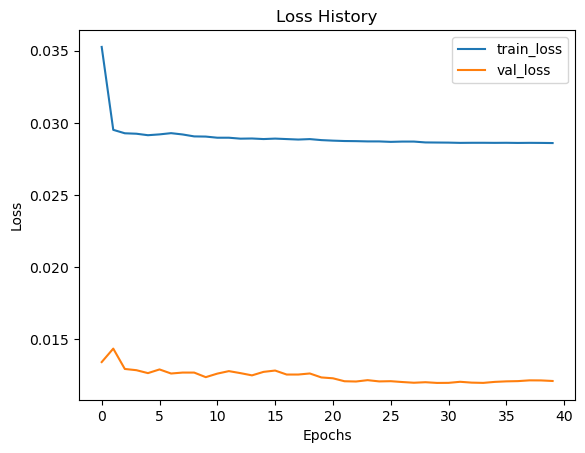

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

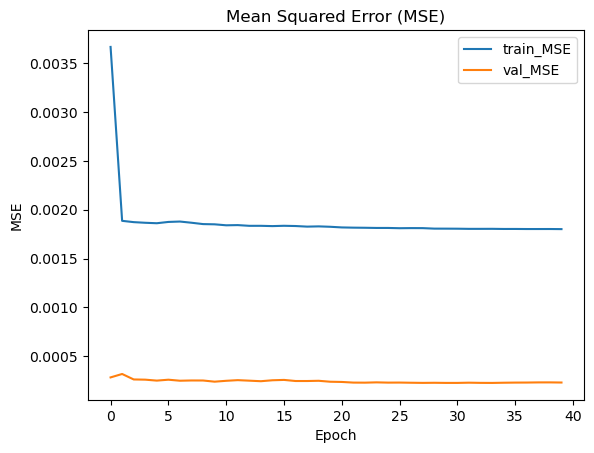

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

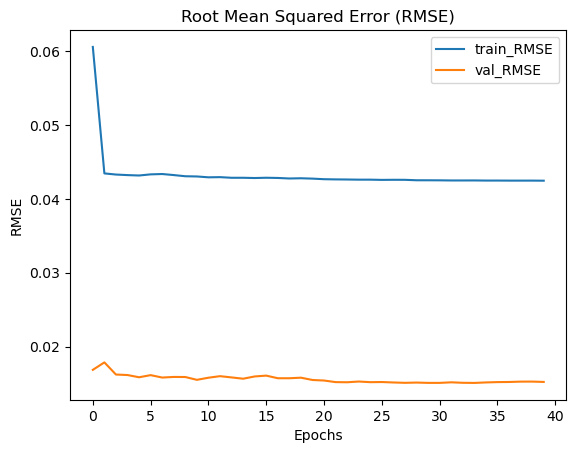

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

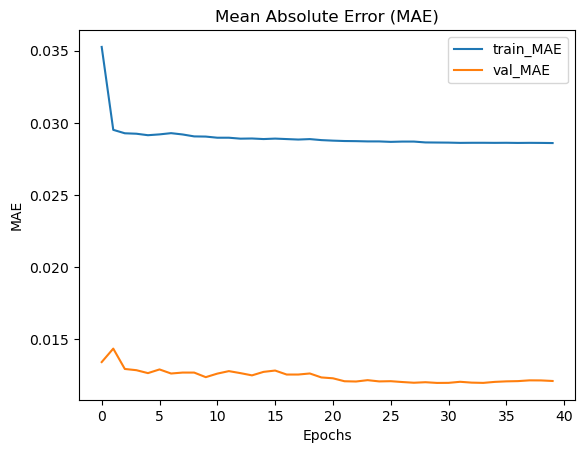

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

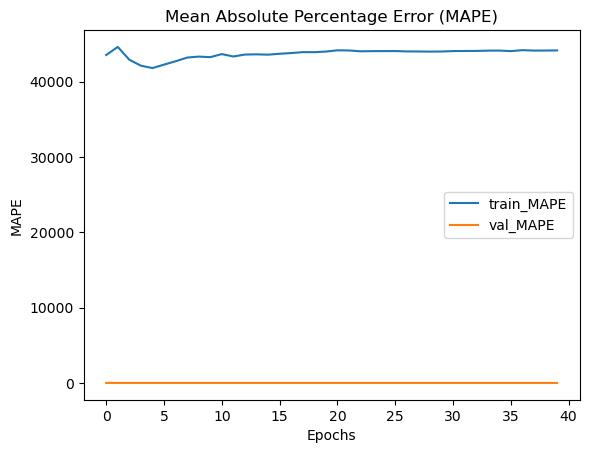

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 23:16:41.651745: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 4)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


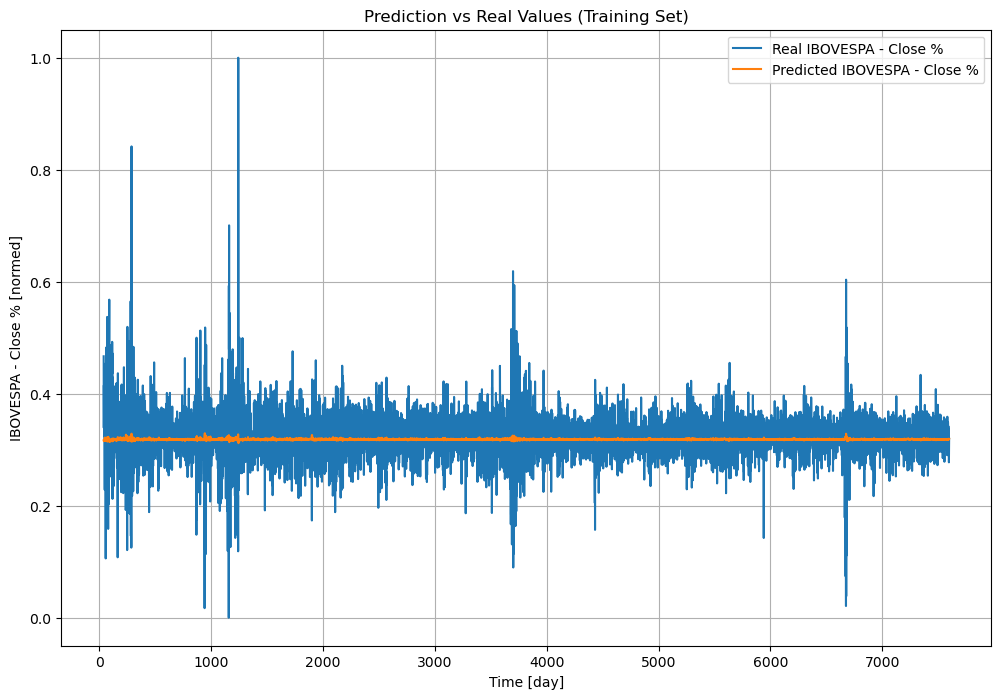

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 4)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


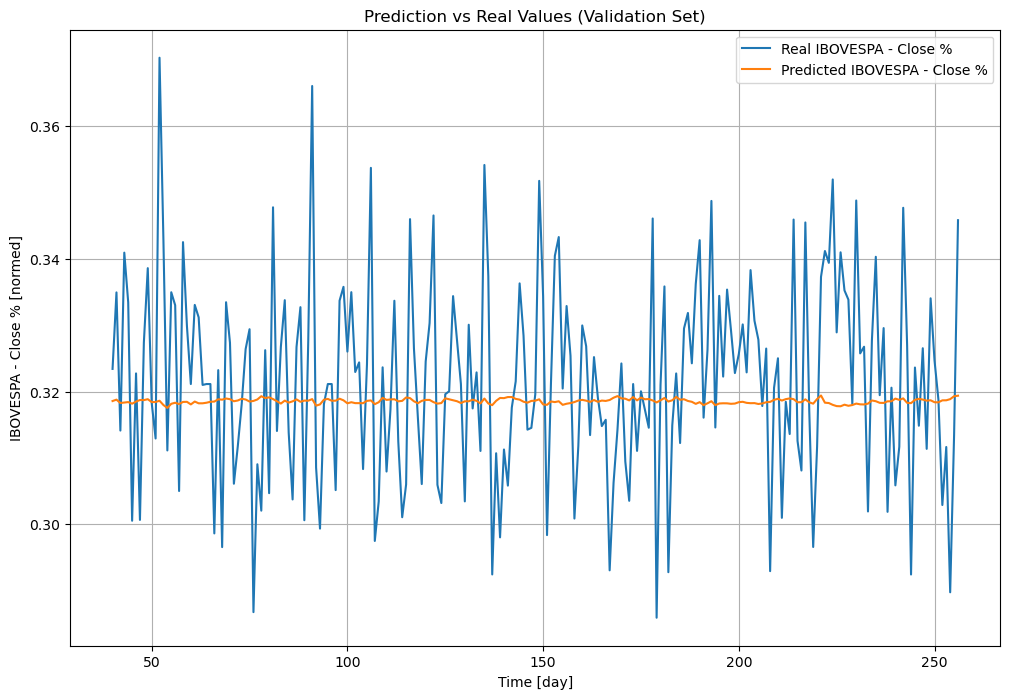

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 4)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


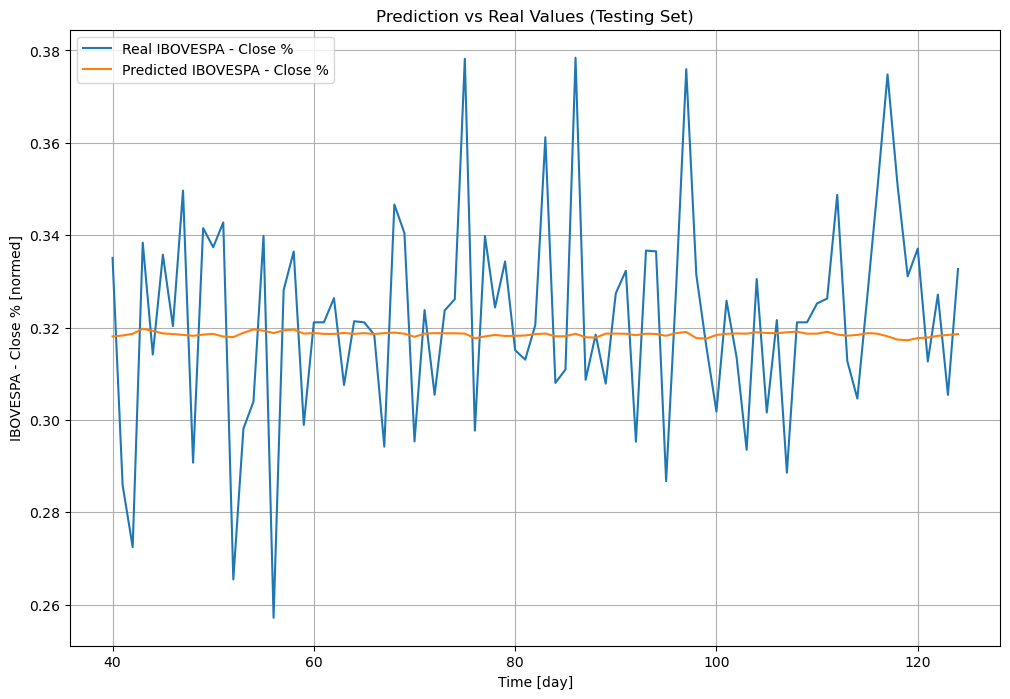

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

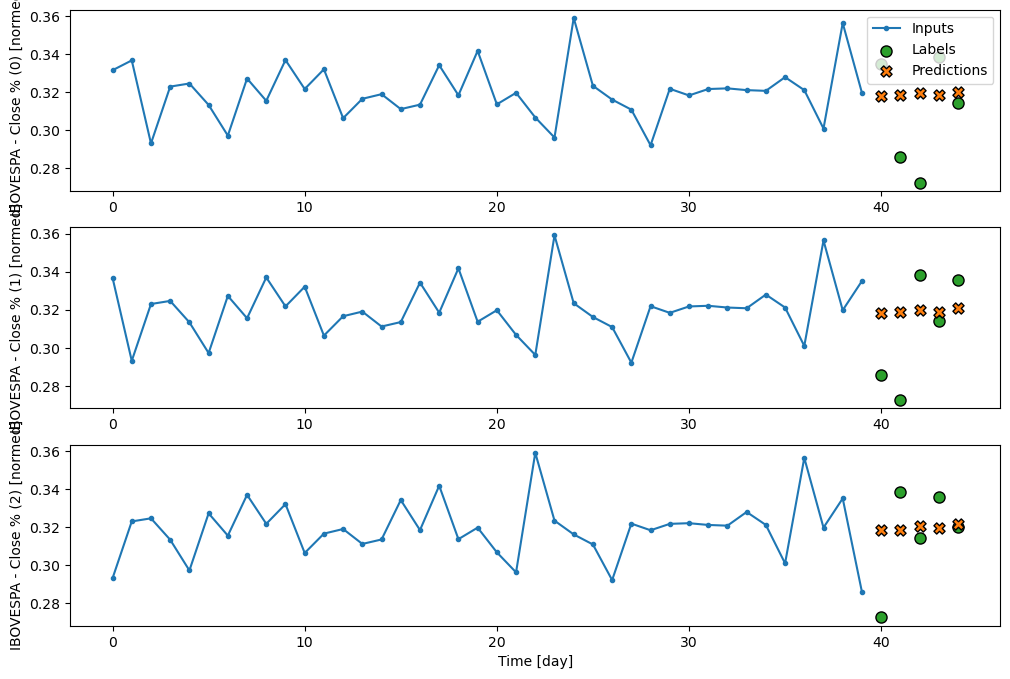

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:54s:440ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[[0.31807324, 0.31807324, 0.31807324, ..., 0.31807324,
         0.31807324, 0.31807324],
        [0.3184464 , 0.3184464 , 0.3184464 , ..., 0.3184464 ,
         0.3184464 , 0.3184464 ],
        [0.319521  , 0.319521  , 0.319521  , ..., 0.319521  ,
         0.319521  , 0.319521  ],
        [0.31857404, 0.31857404, 0.31857404, ..., 0.31857404,
         0.31857404, 0.31857404],
        [0.3201245 , 0.3201245 , 0.3201245 , ..., 0.3201245 ,
         0.3201245 , 0.3201245 ]],

       [[0.31828958, 0.31828958, 0.31828958, ..., 0.31828958,
         0.31828958, 0.31828958],
        [0.31855917, 0.31855917, 0.31855917, ..., 0.31855917,
         0.31855917, 0.31855917],
        [0.3198754 , 0.3198754 , 0.3198754 , ..., 0.3198754 ,
         0.3198754 , 0.3198754 ],
        [0.3188897 , 0.3188897 , 0.3188897 , ..., 0.3188897 ,
         0.3188897 , 0.3188897 ],
        [0.32070345, 0.32070345, 0.32070345, ..., 0.32070345,
         0.32070348, 0.32070348]],

       [[0.31865057, 0.31865057, 0.3

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')